In [0]:
import numpy as np
import pandas as pd


In [0]:

import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('time_series_covid_19_confirmed.csv')

In [0]:
df = df.drop(['Lat', 'Long'], axis=1)
df

Province/State         Country/Region  1/22/20  ...  5/31/20  6/1/20  6/2/20
0              NaN            Afghanistan        0  ...    15205   15750   16509
1              NaN                Albania        0  ...     1137    1143    1164
2              NaN                Algeria        0  ...     9394    9513    9626
3              NaN                Andorra        0  ...      764     765     844
4              NaN                 Angola        0  ...       86      86      86
..             ...                    ...      ...  ...      ...     ...     ...
261            NaN  Sao Tome and Principe        0  ...      483     484     484
262            NaN                  Yemen        0  ...      323     354     399
263            NaN                Comoros        0  ...      106     106     132
264            NaN             Tajikistan        0  ...     3930    4013    4100
265            NaN                Lesotho        0  ...        2       2       2

[266 rows x 135 columns]

In [0]:
df = df.iloc[:,0:129]

In [0]:
df= df.groupby(['Country/Region']).sum()
df

1/22/20  1/23/20  1/24/20  ...  5/25/20  5/26/20  5/27/20
Country/Region                                 ...                           
Afghanistan               0        0        0  ...    11173    11831    12456
Albania                   0        0        0  ...     1004     1029     1050
Algeria                   0        0        0  ...     8503     8697     8857
Andorra                   0        0        0  ...      763      763      763
Angola                    0        0        0  ...       70       70       71
...                     ...      ...      ...  ...      ...      ...      ...
West Bank and Gaza        0        0        0  ...      423      429      434
Western Sahara            0        0        0  ...        9        9        9
Yemen                     0        0        0  ...      233      249      256
Zambia                    0        0        0  ...      920      920     1057
Zimbabwe                  0        0        0  ...       56       56      132

[188 rows x 127 columns]

In [0]:
# Total confirmed cases upto 27 May:
df['total']=df.loc[:,df.columns[2:]].sum(axis=1)

In [0]:
list = []
for country,totalcases in zip(df.index,df['total']):
    print(country,":",totalcases/df.columns[0:-1].size)
    list.append(totalcases/df.columns[0:-1].size)

Afghanistan : 1556.6299212598426
Albania : 333.09448818897636
Algeria : 1960.0551181102362
Andorra : 333.3543307086614
Angola : 15.456692913385826
Antigua and Barbuda : 10.653543307086615
Argentina : 2334.448818897638
Armenia : 1235.8582677165355
Australia : 3253.8267716535433
Austria : 7368.842519685039
Azerbaijan : 931.9133858267717
Bahamas : 33.09448818897638
Bahrain : 1767.0708661417323
Bangladesh : 4938.692913385827
Barbados : 36.653543307086615
Belarus : 6886.070866141732
Belgium : 19988.56692913386
Belize : 7.2047244094488185
Benin : 54.503937007874015
Bhutan : 5.0078740157480315
Bolivia : 917.0236220472441
Bosnia and Herzegovina : 748.8110236220473
Botswana : 9.031496062992126
Brazil : 56009.68503937008
Brunei : 75.33070866141732
Bulgaria : 671.0236220472441
Burkina Faso : 297.29133858267716
Burma : 58.125984251968504
Burundi : 6.803149606299213
Cabo Verde : 72.10236220472441
Cambodia : 64.15748031496064
Cameroon : 932.1889763779527
Canada : 23518.299212598424
Central African R

In [0]:
df['trend'] = list
dicts = {}
for country,i in zip(df.index,df['trend']):
    print('Difference between trend in Pakistan And', country,'is',abs(9817.149606299212-i))
    dicts[country] = abs(9817.149606299212-i)

Difference between trend in Pakistan And Afghanistan is 8260.51968503937
Difference between trend in Pakistan And Albania is 9484.055118110235
Difference between trend in Pakistan And Algeria is 7857.094488188975
Difference between trend in Pakistan And Andorra is 9483.79527559055
Difference between trend in Pakistan And Angola is 9801.692913385827
Difference between trend in Pakistan And Antigua and Barbuda is 9806.496062992126
Difference between trend in Pakistan And Argentina is 7482.700787401574
Difference between trend in Pakistan And Armenia is 8581.291338582676
Difference between trend in Pakistan And Australia is 6563.322834645669
Difference between trend in Pakistan And Austria is 2448.3070866141725
Difference between trend in Pakistan And Azerbaijan is 8885.23622047244
Difference between trend in Pakistan And Bahamas is 9784.055118110235
Difference between trend in Pakistan And Bahrain is 8050.07874015748
Difference between trend in Pakistan And Bangladesh is 4878.45669291338

In [0]:
# Sorting the countries in order to find which countries are closely realted to Pkaistan according to trend:
import operator
sorted_dicts = sorted(dicts.items(), key=operator.itemgetter(1))
sorted_dicts

[('Pakistan', 0.0),
 ('Ecuador', 272.0078740157478),
 ('Sweden', 469.5354330708651),
 ('Portugal', 759.4488188976393),
 ('Chile', 1245.9921259842522),
 ('Mexico', 1629.960629921261),
 ('Ireland', 1783.999999999999),
 ('Qatar', 2290.9448818897627),
 ('Austria', 2448.3070866141725),
 ('Singapore', 2804.724409448818),
 ('Saudi Arabia', 2812.9763779527566),
 ('Belarus', 2931.07874015748),
 ('Korea, South', 2969.464566929133),
 ('Israel', 3205.110236220472),
 ('United Arab Emirates', 3784.472440944881),
 ('Switzerland', 3912.393700787403),
 ('Poland', 4094.149606299212),
 ('Japan', 4210.661417322834),
 ('Romania', 4547.881889763778),
 ('Bangladesh', 4878.456692913385),
 ('Indonesia', 4926.48031496063),
 ('Ukraine', 5155.669291338582),
 ('Denmark', 5660.543307086614),
 ('Philippines', 5926.401574803149),
 ('Colombia', 5957.346456692912),
 ('South Africa', 6074.645669291338),
 ('Norway', 6100.314960629921),
 ('Czechia', 6383.0551181102355),
 ('Serbia', 6389.110236220471),
 ('Dominican Republi



***So Ecuador, Sweden, Portugal, Chile, Mexico are top 5 countries having same trend as Pakistan***

In [0]:
df = pd.read_csv('time_series_covid_19_confirmed.csv')
df = df.drop(['Lat', 'Long'], axis=1)
df = df.groupby('Country/Region').sum()
df.columns = pd.to_datetime(df.columns)
labels = ['Ecuador' , 'Sweden','Portugal','Chile','Mexico','Pakistan']
data = df.loc[df.index.intersection(labels)].reindex(labels)

In [0]:
data

2020-01-22  2020-01-23  ...  2020-06-01  2020-06-02
Ecuador            0           0  ...       39098       40414
Sweden             0           0  ...       37814       38589
Portugal           0           0  ...       32700       32895
Chile              0           0  ...      105158      108686
Mexico             0           0  ...       93435       97326
Pakistan           0           0  ...       72460       76398

[6 rows x 133 columns]

# **Ecuador Country Prediction:**

In [0]:
# Selecting data of Ecuador Country:
ecuador = data.iloc[0].values.astype(np.int64)


In [0]:
# Spliting the data:
test_data_size = 23
ecu_train_data = ecuador[:-test_data_size] # 2020-01-22 to 2020-05-10
ecu_test_data = ecuador[-test_data_size:-6] # 2020-05-11 to 2020-05-27

In [0]:

len(ecu_train_data)


110

In [0]:
# Nomalizing the data:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
ecu_train_data_normalized = scaler.fit_transform(ecu_train_data .reshape(-1, 1))
ecu_test_data_normalized = scaler.fit_transform(ecu_test_data .reshape(-1, 1))

In [0]:
# Conversion of data to tensor:
ecu_train_data_normalized = torch.FloatTensor(ecu_train_data_normalized).view(-1)

In [0]:
train_window = 23
def create_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [0]:
ecu_train_inout_seq = create_sequences(ecu_train_data_normalized, train_window)


In [0]:
ecu_train_inout_seq[:5]

[(tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
          -1., -1., -1., -1., -1., -1., -1., -1., -1.]), tensor([-1.])),
 (tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
          -1., -1., -1., -1., -1., -1., -1., -1., -1.]), tensor([-1.])),
 (tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
          -1., -1., -1., -1., -1., -1., -1., -1., -1.]), tensor([-1.])),
 (tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
          -1., -1., -1., -1., -1., -1., -1., -1., -1.]), tensor([-1.])),
 (tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
          -1., -1., -1., -1., -1., -1., -1., -1., -1.]), tensor([-1.]))]

In [0]:
class Ecuador(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=150, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size,num_layers=2)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(2,1,self.hidden_layer_size),
                            torch.zeros(2,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [0]:
Ecuador_Model = Ecuador()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(Ecuador_Model.parameters(), lr=0.001)

In [0]:
print(Ecuador_Model)

Ecuador(
  (lstm): LSTM(1, 150, num_layers=2)
  (linear): Linear(in_features=150, out_features=1, bias=True)
)


In [0]:
# Training the Model

def trainModel(model,sequence):

  epochs = 1500

  for i in range(epochs):
      for seq, labels in sequence:
          optimizer.zero_grad()
          model.hidden_cell = (torch.zeros(2, 1, model.hidden_layer_size),
                          torch.zeros(2, 1, model.hidden_layer_size))

          y_pred = model(seq)

          single_loss = loss_function(y_pred, labels)
          single_loss.backward()
          optimizer.step()

      if i%50 == 1:
          print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

  print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

trainModel(Ecuador_Model,ecu_train_inout_seq)

epoch:   1 loss: 0.10915887
epoch:  51 loss: 1.84682262
epoch: 101 loss: 1.84700465
epoch: 151 loss: 1.84701347
epoch: 201 loss: 1.84701443
epoch: 251 loss: 1.84701443
epoch: 301 loss: 1.84700990
epoch: 351 loss: 0.00552182
epoch: 401 loss: 0.00596039
epoch: 451 loss: 0.00160063
epoch: 501 loss: 0.00150775
epoch: 551 loss: 0.00055688
epoch: 601 loss: 0.00129332
epoch: 651 loss: 0.00025180
epoch: 701 loss: 0.00003218
epoch: 751 loss: 0.00026838
epoch: 801 loss: 0.00031270
epoch: 851 loss: 0.00051185
epoch: 901 loss: 0.00071981
epoch: 951 loss: 0.00011741
epoch: 1001 loss: 0.00046121
epoch: 1051 loss: 0.00048434
epoch: 1101 loss: 0.00044082
epoch: 1151 loss: 0.00024007
epoch: 1201 loss: 0.00001567
epoch: 1251 loss: 0.00013607
epoch: 1301 loss: 0.00019729
epoch: 1351 loss: 0.00003174
epoch: 1401 loss: 0.00010179
epoch: 1451 loss: 0.00001944
epoch: 1499 loss: 0.0000395906


In [0]:
del list

In [0]:
len(ecu_train_data_normalized[-train_window:])

23

In [0]:
fut_pred = 25
from itertools import chain 
ecu_test_inputs = ecu_train_data_normalized[-train_window:].tolist()
print(len(ecu_test_inputs))

23


In [0]:
ecu_train_data_normalized

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9996,
        -0.9996, -0.9996, -0.9994, -0.9992, -0.9992, -0.9992, -0.9991, -0.9991,
        -0.9991, -0.9989, -0.9989, -0.9989, -0.9982, -0.9982, -0.9977, -0.9964,
        -0.9930, -0.9875, -0.9770, -0.9683, -0.9505, -0.9385, -0.9321, -0.9264,
        -0.9120, -0.8999, -0.8856, -0.8793, -0.8769, -0.8595, -0.8276, -0.8016,
        -0.7887, -0.7826, -0.7713, -0.7649, -0.7649, -0.7208, -0.6885, -0.5508,
        -0.5447, -0.5316, -0.5277, -0.5230, -0.5070, -0.4840, -0.4699, -0.4340,
        -0.4060, -0.3646, -0.3477, -0.3193, -0.2985,  0.4252,  0.4252,  0.4252,
         0.4579,  0.5218,  0.5479,  0.56

In [0]:
len(ecu_test_inputs)

23

In [0]:
def future_Prediction(model,test_inputs):
  model.eval()

  for i in range(fut_pred):
      seq = torch.FloatTensor(ecu_test_inputs[-train_window:])
      with torch.no_grad():
          model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                          torch.zeros(1, 1, model.hidden_layer_size))
          test_inputs.append(model(seq).item())


In [0]:
future_Prediction(Ecuador_Model,ecu_test_inputs)
len(ecu_test_inputs)

48

In [0]:
ecu_actual_predictions = scaler.inverse_transform(np.array(ecu_test_inputs).reshape(-1, 1))

ecu_actual_predictions = list(chain.from_iterable(ecu_actual_predictions))
print(ecu_actual_predictions)

[31941.01498129964, 32061.240942418575, 32239.153712391853, 32311.93630233407, 32433.779668569565, 32523.544756114483, 35633.24595016241, 35633.24595016241, 35633.24595016241, 35773.689347177744, 36048.1063926816, 36160.51489573717, 36230.3322429657, 36608.262319505215, 36912.33166408539, 37471.4093208313, 38103.0, 38103.0, 38103.0, 37676.27858662605, 37277.32249969244, 37345.52244180441, 37477.07011067867, 38066.18616914749, 38068.12193286419, 38164.07157802582, 38072.055441617966, 38052.63684761524, 36990.21272987127, 34855.54384870827, 34309.46901497245, 32166.46755206585, 37183.444874703884, 31076.77651965618, 36926.523337483406, 37064.19870507717, 37291.67271208763, 37408.041360497475, 37605.795580506325, 37638.897703528404, 37980.36406683922, 37910.65531498194, 37553.39370369911, 37441.854988098145, 37304.29103320837, 37474.60263943672, 37559.281416893005, 37884.305314064026]


In [0]:
# Conversion of test data to Series:
ecu_test_data = pd.Series(ecu_test_data, index =data.iloc[0][110:-6].index) 


In [0]:
len(ecu_test_data)

17

In [0]:
from datetime import datetime
start_date = '2020-05-11'
end_date = '2020-06-27'
pred_dates = pd.date_range(start_date, end_date).tolist()

In [0]:
pred_dates = pd.to_datetime(pred_dates)

In [0]:
#Conversion of predicted values to Series:
ecu_actual_predictions = pd.Series(ecu_actual_predictions, index =pred_dates) 

In [0]:
# (4) Prediction of	Cases Reported on each day from 2020-05-11 to 2020-06-27
ecu_actual_predictions

2020-05-11    31941.014981
2020-05-12    32061.240942
2020-05-13    32239.153712
2020-05-14    32311.936302
2020-05-15    32433.779669
2020-05-16    32523.544756
2020-05-17    35633.245950
2020-05-18    35633.245950
2020-05-19    35633.245950
2020-05-20    35773.689347
2020-05-21    36048.106393
2020-05-22    36160.514896
2020-05-23    36230.332243
2020-05-24    36608.262320
2020-05-25    36912.331664
2020-05-26    37471.409321
2020-05-27    38103.000000
2020-05-28    38103.000000
2020-05-29    38103.000000
2020-05-30    37676.278587
2020-05-31    37277.322500
2020-06-01    37345.522442
2020-06-02    37477.070111
2020-06-03    38066.186169
2020-06-04    38068.121933
2020-06-05    38164.071578
2020-06-06    38072.055442
2020-06-07    38052.636848
2020-06-08    36990.212730
2020-06-09    34855.543849
2020-06-10    34309.469015
2020-06-11    32166.467552
2020-06-12    37183.444875
2020-06-13    31076.776520
2020-06-14    36926.523337
2020-06-15    37064.198705
2020-06-16    37291.672712
2

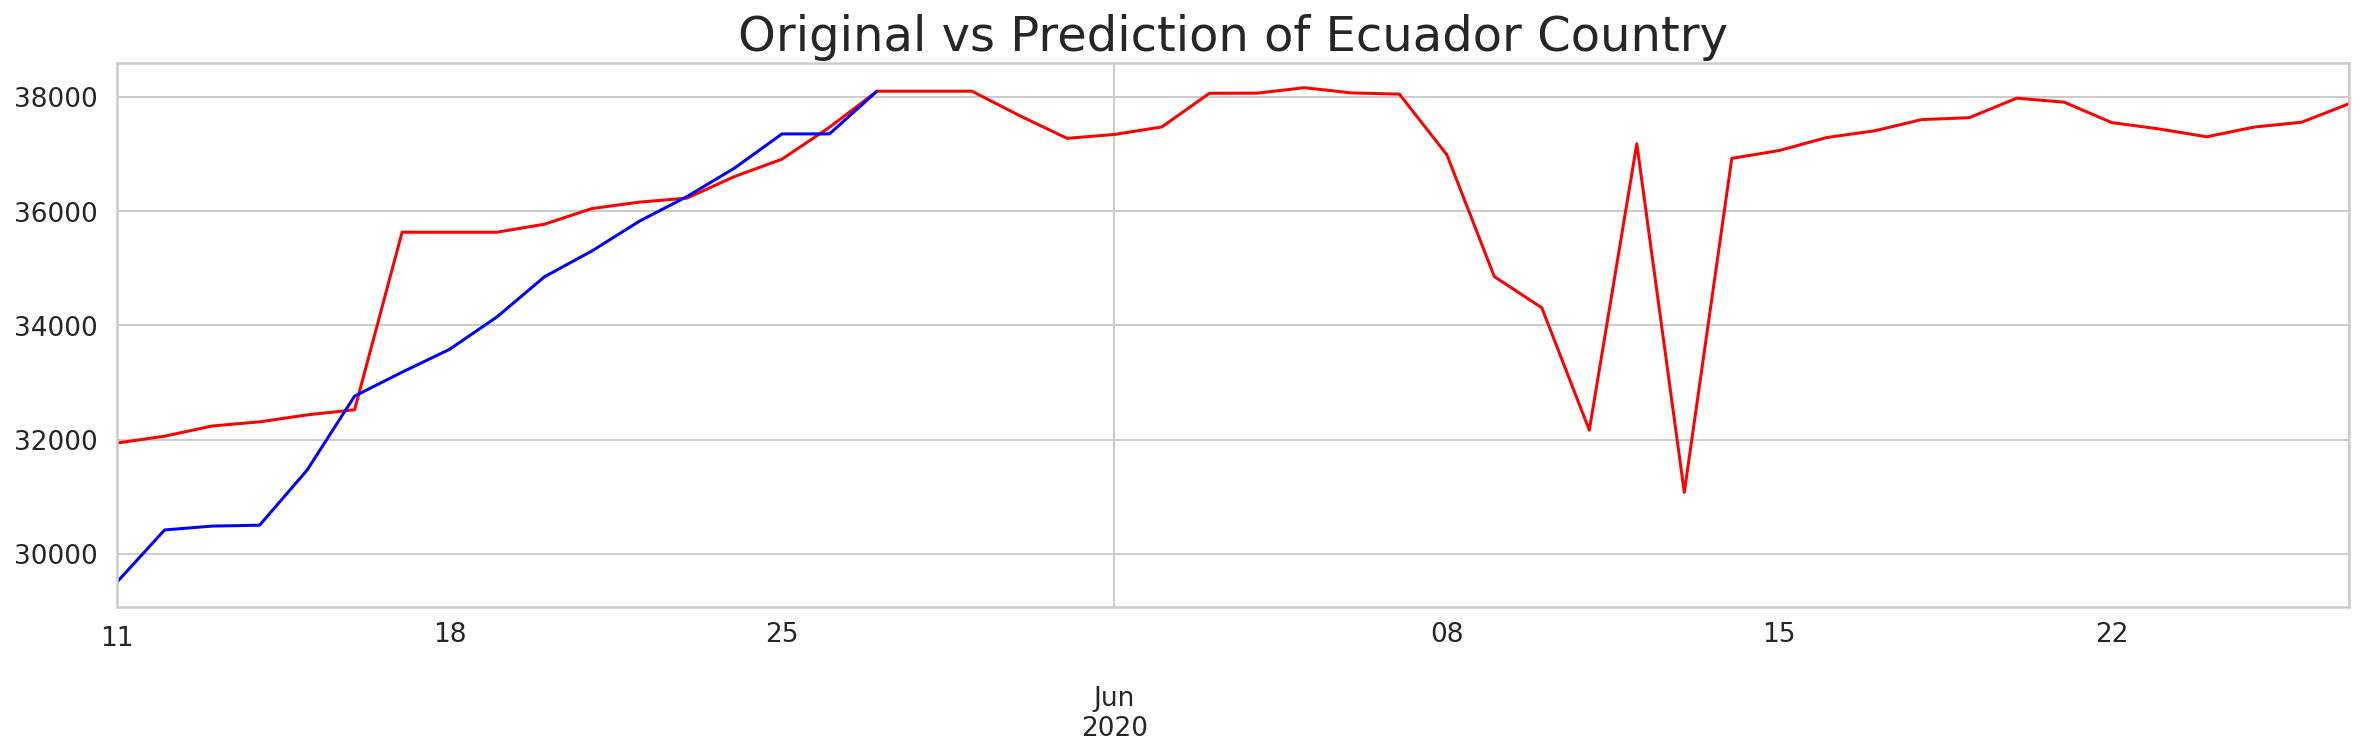

In [0]:
# Plotting the original and predicted time series of Ecuador Country:
ecu_actual_predictions.plot(figsize=(20,5),color='red')
ecu_test_data.plot(figsize=(20,5),color='blue')
plt.title("Original vs Prediction of Ecuador Country",size=24)
plt.show()

# **Sweden Country Prediction:**

In [0]:
# Selecting data of Sweden Country:
sweden = data.iloc[1].values.astype(np.int64)

In [0]:
sweden

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     2,
           7,     7,    12,    14,    15,    21,    35,    94,   101,
         161,   203,   248,   355,   500,   599,   814,   961,  1022,
        1103,  1190,  1279,  1439,  1639,  1763,  1934,  2046,  2286,
        2526,  2840,  3069,  3447,  3700,  4028,  4435,  4947,  5568,
        6131,  6443,  6830,  7206,  7693,  8419,  9141,  9685, 10151,
       10483, 10948, 11445, 11927, 12540, 13216, 13822, 14385, 14777,
       15322, 16004, 16755, 17567, 18177, 18640, 18926, 19621, 20302,
       21092, 21520, 22082, 22317, 22721, 23216, 23918, 24623, 25265,
       25921, 26322, 26670, 27272, 27909, 28582, 29207, 29677, 30143,
       30377, 30799, 31523, 32172, 32809, 33188, 33459, 33843, 34440,
       35088, 35727,

In [0]:
# Spliting the data:

sweden_train_data = sweden[:-test_data_size] # 2020-01-22 to 2020-05-10
sweden_test_data = sweden[-test_data_size:-6] # 2020-05-11 to 2020-06-02

In [0]:
# Nomalizing the data:
sweden_train_data_normalized = scaler.fit_transform(sweden_train_data .reshape(-1, 1))
sweden_test_data_normalized = scaler.fit_transform(sweden_test_data .reshape(-1, 1))

In [0]:
# Conversion of data to tensor:
sweden_train_data_normalized = torch.FloatTensor(sweden_train_data_normalized).view(-1)

In [0]:
sweden_train_inout_seq = create_sequences(sweden_train_data_normalized, train_window)

In [0]:
class Sweden(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=150, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size,num_layers=2)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(2,1,self.hidden_layer_size),
                            torch.zeros(2,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [0]:
Sweden_Model = Sweden()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(Sweden_Model.parameters(), lr=0.001)

In [0]:
trainModel(Sweden_Model,sweden_train_inout_seq)

epoch:   1 loss: 0.00846170
epoch:  51 loss: 0.00004037
epoch: 101 loss: 0.00090342
epoch: 151 loss: 0.00078978
epoch: 201 loss: 0.00166408
epoch: 251 loss: 0.00079082
epoch: 301 loss: 0.00073760
epoch: 351 loss: 0.00071579
epoch: 401 loss: 0.00021471
epoch: 451 loss: 0.00055186
epoch: 501 loss: 0.00030190
epoch: 551 loss: 0.00000055
epoch: 601 loss: 0.00662482
epoch: 651 loss: 0.00176394
epoch: 701 loss: 0.00001765
epoch: 751 loss: 0.00056090
epoch: 801 loss: 0.00003867
epoch: 851 loss: 0.00018700
epoch: 901 loss: 0.00001425
epoch: 951 loss: 0.00000073
epoch: 1001 loss: 0.00009115
epoch: 1051 loss: 0.00009069
epoch: 1101 loss: 0.00040804
epoch: 1151 loss: 0.00000040
epoch: 1201 loss: 0.00000368
epoch: 1251 loss: 0.00000737
epoch: 1301 loss: 0.00000050
epoch: 1351 loss: 0.00006779
epoch: 1401 loss: 0.00117573
epoch: 1451 loss: 0.00001549
epoch: 1499 loss: 0.0008696000


In [0]:
sweden_test_inputs = sweden_train_data_normalized[-train_window:].tolist()

In [0]:
future_Prediction(Sweden_Model,sweden_test_inputs)
len(sweden_test_inputs)

48

In [0]:
sweden_actual_predictions = scaler.inverse_transform(np.array(sweden_test_inputs).reshape(-1, 1))
sweden_actual_predictions = list(chain.from_iterable(sweden_actual_predictions))

In [0]:
# Conversion of test data to Series:
sweden_test_data = pd.Series(sweden_test_data, index =data.iloc[0][110:-6].index) 

In [0]:
sweden_actual_predictions = pd.Series(sweden_actual_predictions, index =pred_dates) 

In [0]:
# (4) Prediction of	Cases Reported on each day from 2020-05-11 to 2020-06-27
sweden_actual_predictions

2020-05-11    31090.393438
2020-05-12    31270.445633
2020-05-13    31395.810572
2020-05-14    31570.106230
2020-05-15    31788.215649
2020-05-16    32028.391802
2020-05-17    32288.076383
2020-05-18    32483.159528
2020-05-19    32631.230904
2020-05-20    32722.696136
2020-05-21    32944.963071
2020-05-22    33162.752622
2020-05-23    33415.401513
2020-05-24    33552.279431
2020-05-25    33732.011728
2020-05-26    33807.166887
2020-05-27    33936.369506
2020-05-28    34094.674740
2020-05-29    34319.180366
2020-05-30    34544.645342
2020-05-31    34749.962470
2020-06-01    34959.756730
2020-06-02    35088.000000
2020-06-03    35096.909608
2020-06-04    35082.531406
2020-06-05    35081.249932
2020-06-06    35081.140550
2020-06-07    35081.130515
2020-06-08    35081.130013
2020-06-09    35081.130515
2020-06-10    35081.130013
2020-06-11    35081.130515
2020-06-12    35081.130013
2020-06-13    35081.129511
2020-06-14    35081.129511
2020-06-15    35081.130013
2020-06-16    35081.129511
2

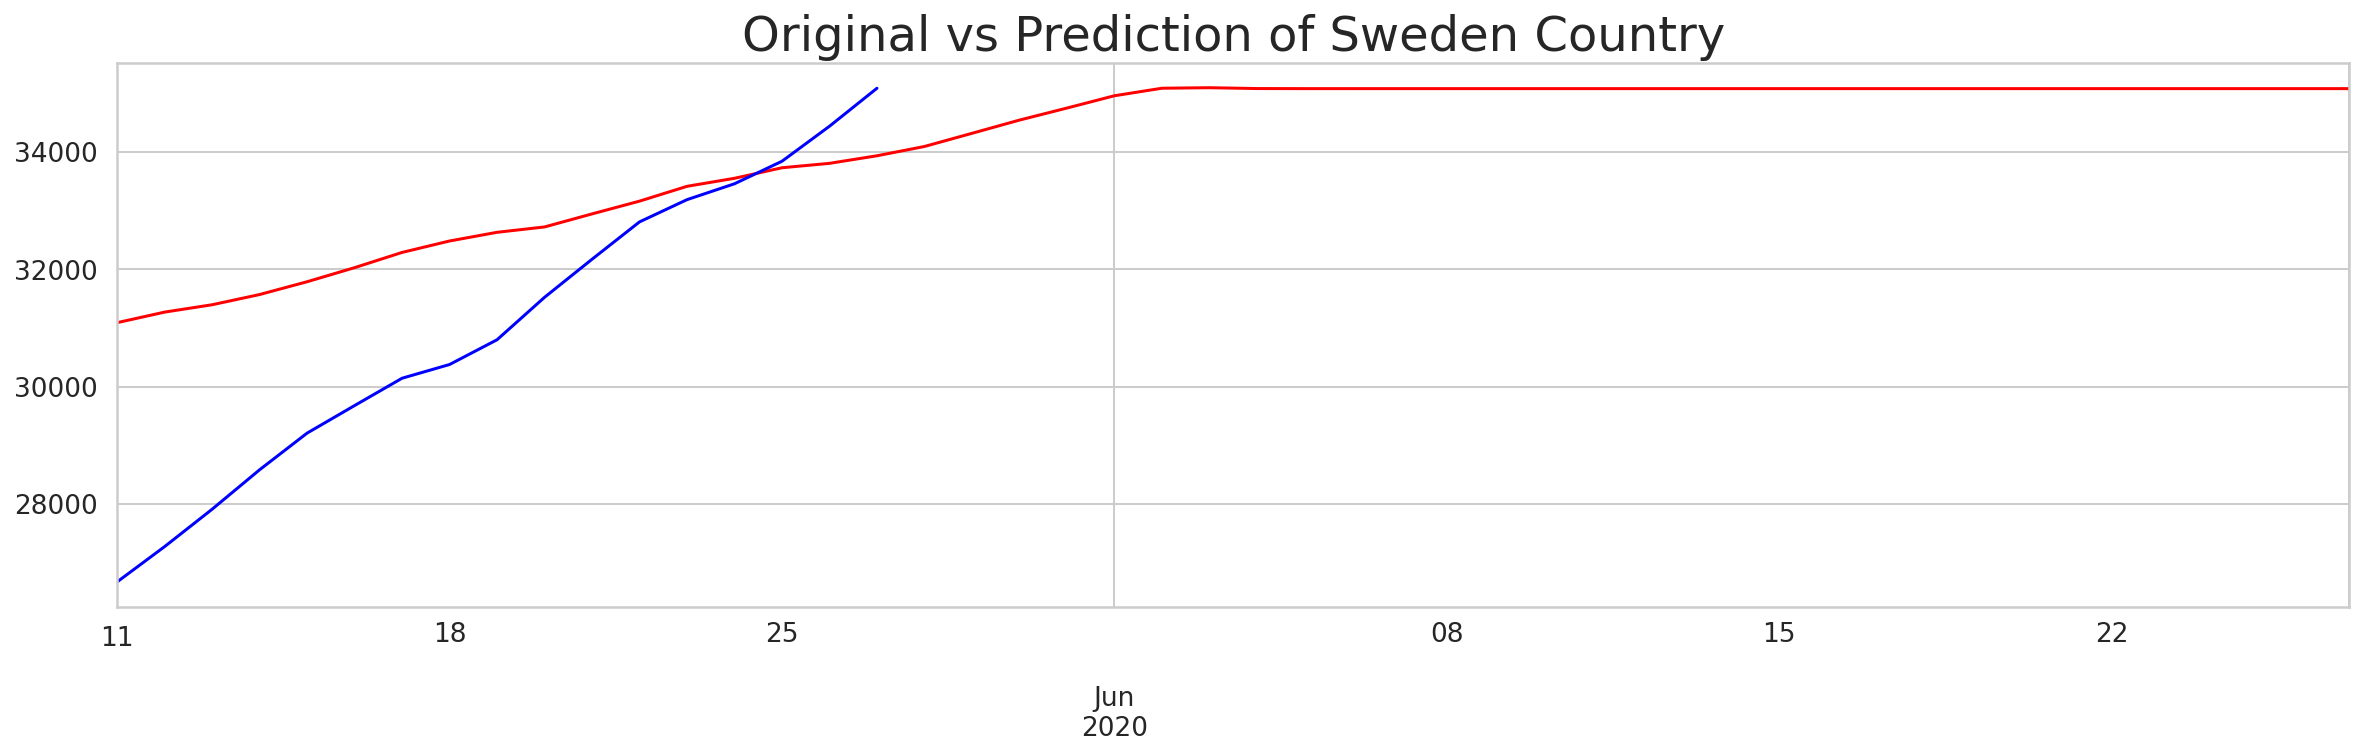

In [0]:
# Plotting the original and predicted time series of Sweden Country:
sweden_actual_predictions.plot(figsize=(20,5),color='red')
sweden_test_data.plot(figsize=(20,5),color='blue')
plt.title("Original vs Prediction of Sweden Country",size=24)
plt.show()

# **Portugal Country Prediction:**

In [0]:
# Selecting data of Ecuador Country:
portugal = data.iloc[2].values.astype(np.int64)

In [0]:
# Spliting the data:
portugal_train_data = portugal[:-test_data_size] # 2020-01-22 to 2020-05-10
portugal_test_data = portugal[-test_data_size:-6] # 2020-05-11 to 2020-06-02

In [0]:
# Nomalizing the data:
portugal_train_data_normalized = scaler.fit_transform(portugal_train_data .reshape(-1, 1))
portugal_test_data_normalized = scaler.fit_transform(portugal_test_data .reshape(-1, 1))

In [0]:
# Conversion of data to tensor:
portugal_train_data_normalized = torch.FloatTensor(sweden_train_data_normalized).view(-1)

In [0]:
portugal_train_inout_seq = create_sequences(portugal_train_data_normalized, train_window)

In [0]:
class Portugal(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=150, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size,num_layers=2)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(2,1,self.hidden_layer_size),
                            torch.zeros(2,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [0]:
Portugal_Model = Portugal()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(Portugal_Model.parameters(), lr=0.001)

In [0]:
trainModel(Portugal_Model,portugal_train_inout_seq)

epoch:   1 loss: 0.00122323
epoch:  51 loss: 0.00029942
epoch: 101 loss: 0.00008647
epoch: 151 loss: 0.00102032
epoch: 201 loss: 0.00009104
epoch: 251 loss: 0.00346736
epoch: 301 loss: 0.00029221
epoch: 351 loss: 0.00030277
epoch: 401 loss: 0.00167494
epoch: 451 loss: 0.00063302
epoch: 501 loss: 0.00039830
epoch: 551 loss: 0.00078108
epoch: 601 loss: 0.00000490
epoch: 651 loss: 0.00005035
epoch: 701 loss: 0.00001197
epoch: 751 loss: 0.00229333
epoch: 801 loss: 0.00066413
epoch: 851 loss: 0.00019366
epoch: 901 loss: 0.00006005
epoch: 951 loss: 0.00000004
epoch: 1001 loss: 0.00007098
epoch: 1051 loss: 0.00001528
epoch: 1101 loss: 0.00000648
epoch: 1151 loss: 0.00011980
epoch: 1201 loss: 0.00018362
epoch: 1251 loss: 0.00000000
epoch: 1301 loss: 0.00000787
epoch: 1351 loss: 0.00023739
epoch: 1401 loss: 0.00002096
epoch: 1451 loss: 0.00021012
epoch: 1499 loss: 0.0000325769


In [0]:
portugal_test_inputs = portugal_train_data_normalized[-train_window:].tolist()

In [0]:
future_Prediction(Portugal_Model,portugal_test_inputs)

In [0]:
portugal_actual_predictions = scaler.inverse_transform(np.array(portugal_test_inputs).reshape(-1, 1))

portugal_actual_predictions = list(chain.from_iterable(portugal_actual_predictions))

In [0]:
# Conversion of test data to Series:
portugal_test_data = pd.Series(portugal_test_data, index =data.iloc[0][110:-6].index) 

In [0]:
# Conversion of actual data to Series:
portugal_actual_predictions = pd.Series(portugal_actual_predictions, index =pred_dates) 

In [0]:
# (4) Prediction of	Cases Reported on each day from 2020-05-11 to 2020-06-27
portugal_actual_predictions

2020-05-11    29576.229923
2020-05-12    29653.508205
2020-05-13    29707.314754
2020-05-14    29782.122334
2020-05-15    29875.734752
2020-05-16    29978.818197
2020-05-17    30090.274646
2020-05-18    30174.004202
2020-05-19    30237.556338
2020-05-20    30276.813155
2020-05-21    30372.209976
2020-05-22    30465.685106
2020-05-23    30574.121842
2020-05-24    30632.869753
2020-05-25    30710.010736
2020-05-26    30742.267280
2020-05-27    30797.720958
2020-05-28    30865.665459
2020-05-29    30962.023124
2020-05-30    31058.792542
2020-05-31    31146.914517
2020-06-01    31236.958074
2020-06-02    31292.000000
2020-06-03    31361.344717
2020-06-04    31291.776250
2020-06-05    31220.999230
2020-06-06    31178.340450
2020-06-07    31155.987602
2020-06-08    31145.157140
2020-06-09    31140.160122
2020-06-10    31137.947385
2020-06-11    31137.013190
2020-06-12    31136.649245
2020-06-13    31136.528002
2020-06-14    31136.503883
2020-06-15    31136.514220
2020-06-16    31136.533171
2

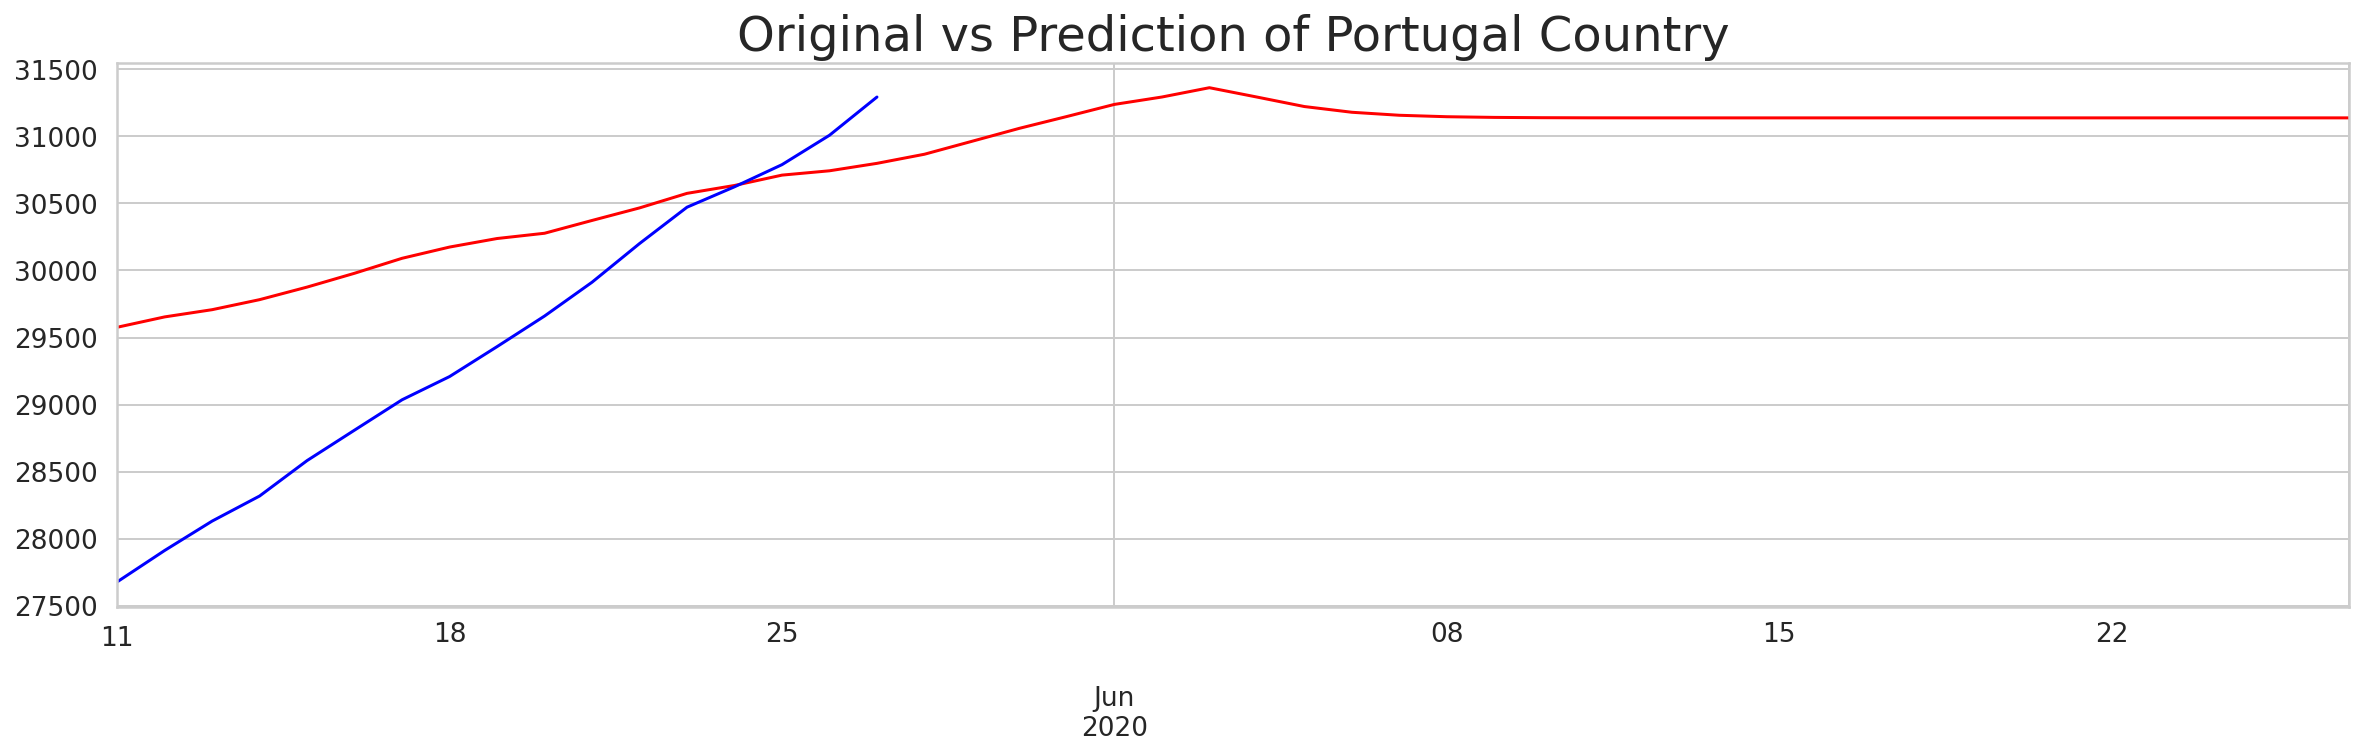

In [0]:
# Plotting the original and predicted time series of Portugal Country:
portugal_actual_predictions.plot(figsize=(20,5),color='red')
portugal_test_data.plot(figsize=(20,5),color='blue')
plt.title("Original vs Prediction of Portugal Country",size=24)
plt.show()

# **Chile Country Prediction:**

In [0]:
# Selecting data of Chile Country:
chile = data.iloc[3].values.astype(np.int64)

In [0]:
# Spliting the data:

chile_train_data = chile[:-test_data_size] # 2020-01-22 to 2020-05-10
chile_test_data = chile[-test_data_size:-6] # 2020-05-11 to 2020-06-02

In [0]:
# Nomalizing the data:
chile_train_data_normalized = scaler.fit_transform(chile_train_data .reshape(-1, 1))
chile_test_data_normalized = scaler.fit_transform(chile_test_data .reshape(-1, 1))

In [0]:
# Conversion of data to tensor:
chile_train_data_normalized = torch.FloatTensor(chile_train_data_normalized).view(-1)

In [0]:
chile_train_inout_seq = create_sequences(chile_train_data_normalized, train_window)

In [0]:
class Chile(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=150, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size,num_layers=2)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(2,1,self.hidden_layer_size),
                            torch.zeros(2,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [0]:
Chile_Model = Chile()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(Chile_Model.parameters(), lr=0.001)

In [0]:
trainModel(Chile_Model,chile_train_inout_seq)

epoch:   1 loss: 0.92199057
epoch:  51 loss: 2.43684411
epoch: 101 loss: 2.43712044
epoch: 151 loss: 2.43713450
epoch: 201 loss: 2.43713570
epoch: 251 loss: 2.43713522
epoch: 301 loss: 2.43713570
epoch: 351 loss: 2.43713522
epoch: 401 loss: 2.30112004
epoch: 451 loss: 0.00008775
epoch: 501 loss: 0.01280406
epoch: 551 loss: 0.00523714
epoch: 601 loss: 0.00556641
epoch: 651 loss: 0.00386746
epoch: 701 loss: 0.00000024
epoch: 751 loss: 0.00065074
epoch: 801 loss: 0.00066678
epoch: 851 loss: 0.00004961
epoch: 901 loss: 0.00002536
epoch: 951 loss: 0.00010628
epoch: 1001 loss: 0.00000358
epoch: 1051 loss: 0.00020144
epoch: 1101 loss: 0.00008517
epoch: 1151 loss: 0.00017355
epoch: 1201 loss: 0.00001185
epoch: 1251 loss: 0.00013441
epoch: 1301 loss: 0.00245891
epoch: 1351 loss: 0.00016524
epoch: 1401 loss: 0.00000000
epoch: 1451 loss: 0.00005064
epoch: 1499 loss: 0.0000066155


In [0]:
chile_test_inputs = chile_train_data_normalized[-train_window:].tolist()

In [0]:
future_Prediction(Chile_Model,chile_test_inputs)

In [0]:
chile_actual_predictions = scaler.inverse_transform(np.array(chile_test_inputs).reshape(-1, 1))

chile_actual_predictions = list(chain.from_iterable(chile_actual_predictions))

In [0]:
# Conversion of test data to Series:
chile_test_data = pd.Series(chile_test_data, index =data.iloc[0][110:-6].index)

In [0]:
# Conversion of actual data to Series:
chile_actual_predictions = pd.Series(chile_actual_predictions, index =pred_dates) 

In [0]:
# (4) Prediction of	Cases Reported on each day from 2020-05-11 to 2020-06-27
chile_actual_predictions

2020-05-11    47667.066239
2020-05-12    48314.779993
2020-05-13    49072.858935
2020-05-14    49660.867034
2020-05-15    50500.362248
2020-05-16    51433.938619
2020-05-17    52327.711348
2020-05-18    53326.420931
2020-05-19    54182.199206
2020-05-20    55054.260929
2020-05-21    56052.970549
2020-05-22    56993.784014
2020-05-23    59052.718021
2020-05-24    60834.835729
2020-05-25    63416.644621
2020-05-26    65638.411757
2020-05-27    67411.482953
2020-05-28    69895.592318
2020-05-29    71762.745059
2020-05-30    74536.335801
2020-05-31    77053.011676
2020-06-01    79309.153922
2020-06-02    82289.000000
2020-06-03    86188.274262
2020-06-04    86164.575662
2020-06-05    86159.943648
2020-06-06    86158.813661
2020-06-07    86158.561515
2020-06-08    86158.524160
2020-06-09    86158.524160
2020-06-10    86158.539725
2020-06-11    86158.545951
2020-06-12    86158.552177
2020-06-13    86158.555290
2020-06-14    86158.558402
2020-06-15    86158.564628
2020-06-16    86158.561515
2

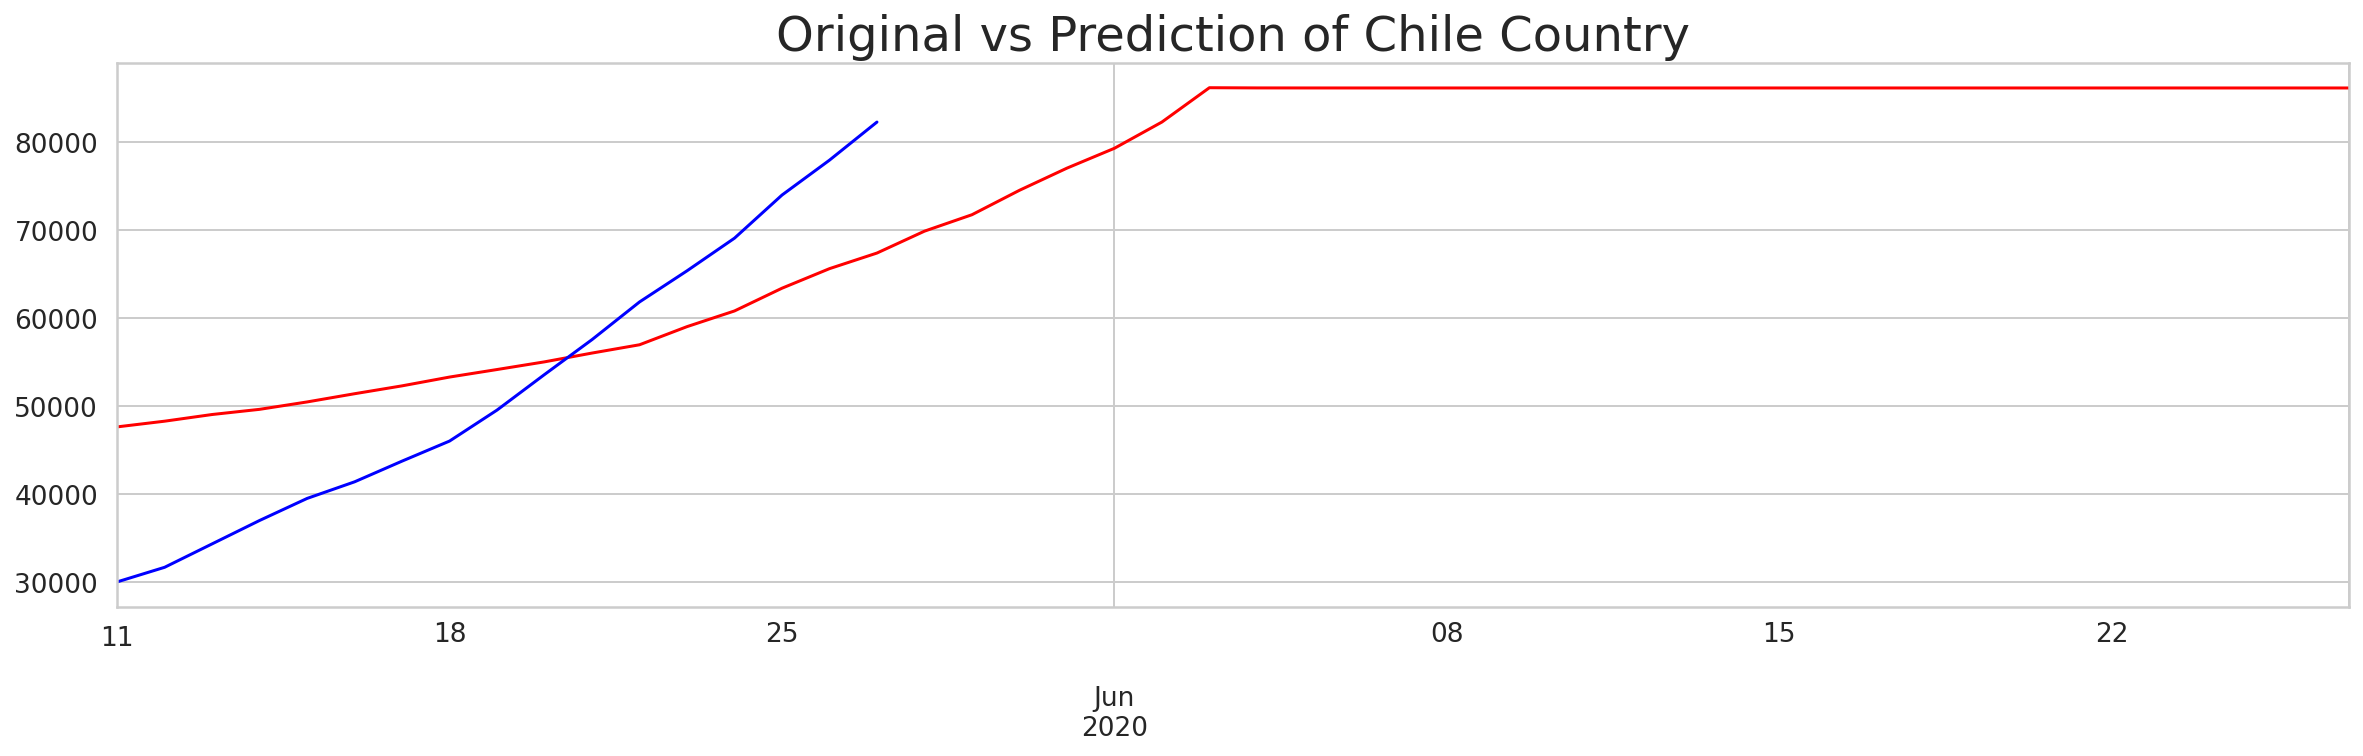

In [0]:
# Plotting the original and predicted time series of Portugal Country:
chile_actual_predictions.plot(figsize=(20,5),color='red')
chile_test_data.plot(figsize=(20,5),color='blue')
plt.title("Original vs Prediction of Chile Country",size=24)
plt.show()

# **Mexico Country Prediction:**

In [0]:
# Selecting data of Mexico Country:
mexico = data.iloc[4].values.astype(np.int64)

In [0]:
# Spliting the data:

mexico_train_data = mexico[:-test_data_size] # 2020-01-22 to 2020-05-10
mexico_test_data = mexico[-test_data_size:-6] # 2020-05-11 to 2020-06-02

In [0]:
# Nomalizing the data:
mexico_train_data_normalized = scaler.fit_transform(mexico_train_data .reshape(-1, 1))
mexico_test_data_normalized = scaler.fit_transform(mexico_test_data .reshape(-1, 1))

In [0]:
# Conversion of data to tensor:
mexico_train_data_normalized = torch.FloatTensor(mexico_train_data_normalized).view(-1)

In [0]:
mexico_train_inout_seq = create_sequences(mexico_train_data_normalized, train_window)

In [0]:
class Mexico(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=150, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size,num_layers=2)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(2,1,self.hidden_layer_size),
                            torch.zeros(2,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [0]:
Mexico_Model = Mexico()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(Mexico_Model.parameters(), lr=0.001)

In [0]:
trainModel(Mexico_Model,mexico_train_inout_seq)

epoch:   1 loss: 0.90945613
epoch:  51 loss: 0.00182808
epoch: 101 loss: 0.03458389
epoch: 151 loss: 0.00016911
epoch: 201 loss: 0.00001176
epoch: 251 loss: 0.00474600
epoch: 301 loss: 0.00012974
epoch: 351 loss: 0.00035152
epoch: 401 loss: 0.00000006
epoch: 451 loss: 0.00115921
epoch: 501 loss: 0.00236564
epoch: 551 loss: 0.00033598
epoch: 601 loss: 0.00215336
epoch: 651 loss: 0.00153055
epoch: 701 loss: 0.00058306
epoch: 751 loss: 0.00247766
epoch: 801 loss: 0.00050525
epoch: 851 loss: 0.00314990
epoch: 901 loss: 0.00233175
epoch: 951 loss: 0.00069906
epoch: 1001 loss: 0.00043094
epoch: 1051 loss: 0.00049590
epoch: 1101 loss: 0.00000063
epoch: 1151 loss: 0.00023787
epoch: 1201 loss: 0.02717654
epoch: 1251 loss: 0.00033232
epoch: 1301 loss: 0.00134858
epoch: 1351 loss: 0.00000839
epoch: 1401 loss: 0.00000000
epoch: 1451 loss: 0.00121417
epoch: 1499 loss: 0.0004409110


In [0]:
mexico_test_inputs = mexico_train_data_normalized[-train_window:].tolist()

In [0]:
future_Prediction(Mexico_Model,mexico_test_inputs)

In [0]:
mexico_actual_predictions = scaler.inverse_transform(np.array(mexico_test_inputs).reshape(-1, 1))

mexico_actual_predictions = list(chain.from_iterable(mexico_actual_predictions))

In [0]:
# Conversion of test data to Series:
mexico_test_data = pd.Series(mexico_test_data, index =data.iloc[0][110:-6].index)

In [0]:
# Conversion of actual data to Series:
mexico_actual_predictions = pd.Series(mexico_actual_predictions, index =pred_dates) 

In [0]:
# (4) Prediction of	Cases Reported on each day from 2020-05-11 to 2020-06-27
mexico_actual_predictions

2020-05-11    47667.066239
2020-05-12    48314.779993
2020-05-13    49072.858935
2020-05-14    49660.867034
2020-05-15    50500.362248
2020-05-16    51433.938619
2020-05-17    52327.711348
2020-05-18    53326.420931
2020-05-19    54182.199206
2020-05-20    55054.260929
2020-05-21    56052.970549
2020-05-22    56993.784014
2020-05-23    59052.718021
2020-05-24    60834.835729
2020-05-25    63416.644621
2020-05-26    65638.411757
2020-05-27    67411.482953
2020-05-28    69895.592318
2020-05-29    71762.745059
2020-05-30    74536.335801
2020-05-31    77053.011676
2020-06-01    79309.153922
2020-06-02    82289.000000
2020-06-03    81966.922541
2020-06-04    82017.216307
2020-06-05    82001.959925
2020-06-06    82000.356775
2020-06-07    82000.176226
2020-06-08    82000.163774
2020-06-09    82000.162218
2020-06-10    82000.154435
2020-06-11    82000.152879
2020-06-12    82000.151323
2020-06-13    82000.151323
2020-06-14    82000.151323
2020-06-15    82000.151323
2020-06-16    82000.151323
2

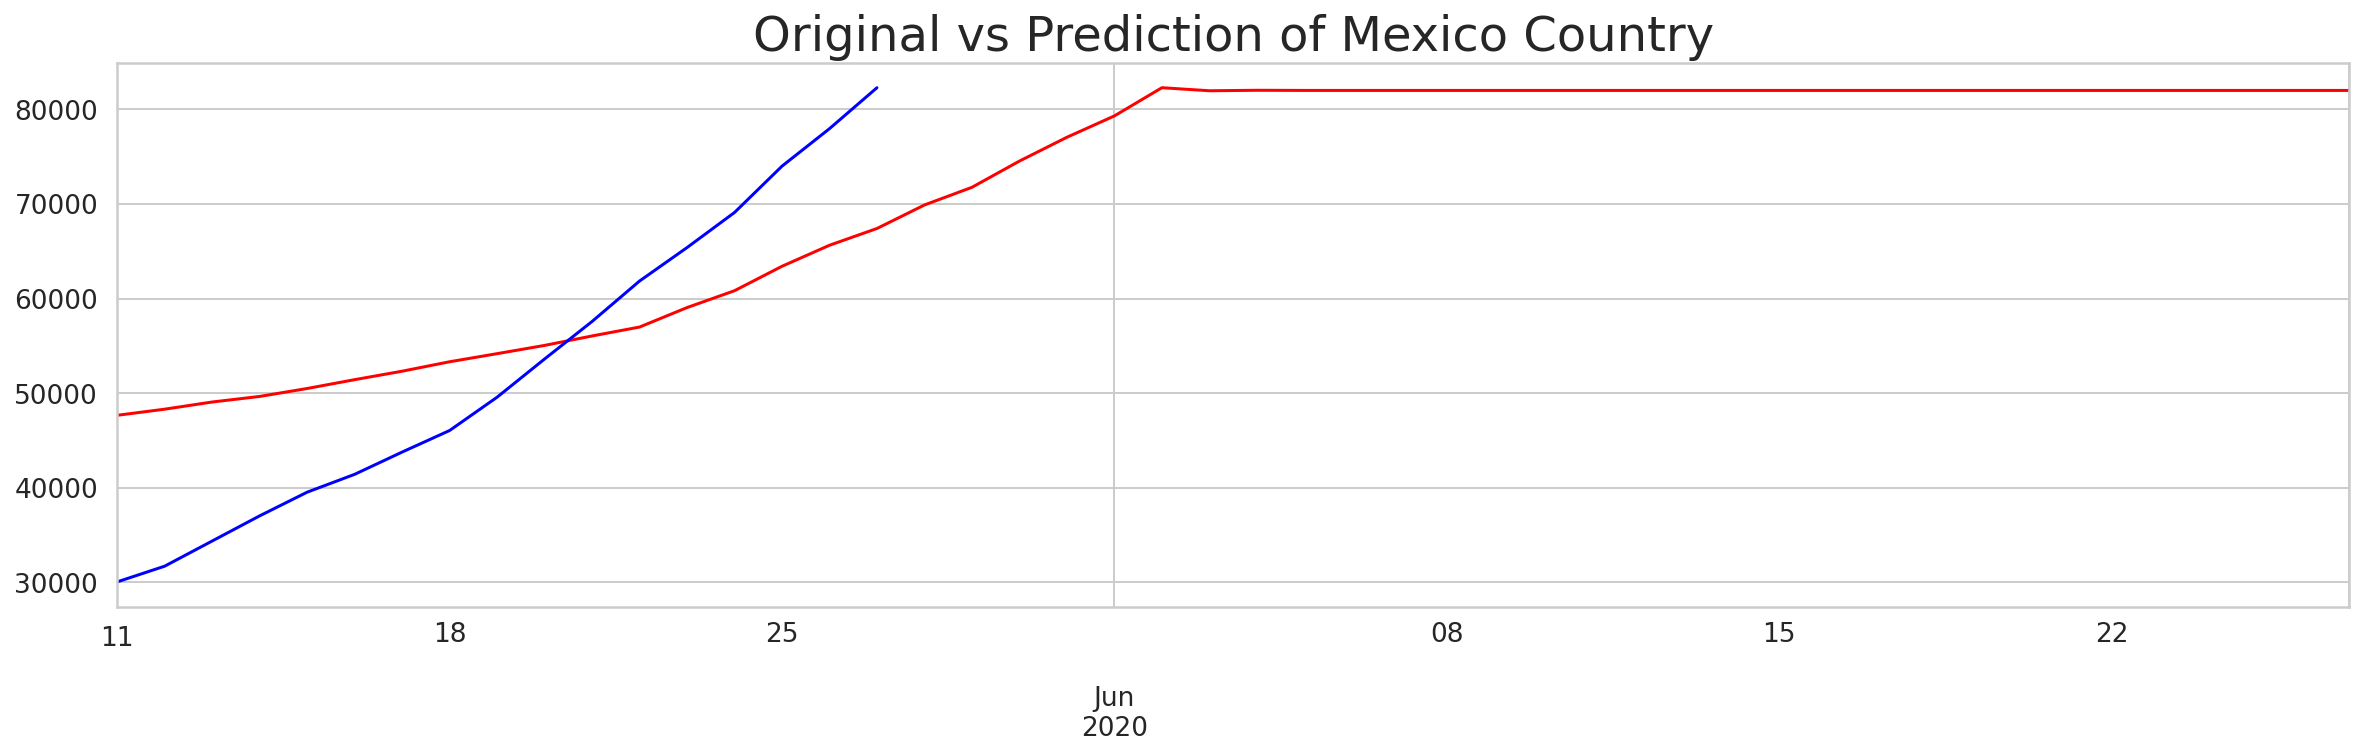

In [0]:
# Plotting the original and predicted time series of Mexico Country:
mexico_actual_predictions.plot(figsize=(20,5),color='red')
mexico_test_data.plot(figsize=(20,5),color='blue')
plt.title("Original vs Prediction of Mexico Country",size=24)
plt.show()

# **Pakistan Country Prediction:**

In [0]:
# Selecting data of Pakistan Country:
pakistan = data.iloc[5].values.astype(np.int64)

In [0]:
# Spliting the data:

pakistan_train_data = pakistan[:-test_data_size] # 2020-01-22 to 2020-05-10
pakistan_test_data = pakistan[-test_data_size:-6] # 2020-05-11 to 2020-06-02

In [0]:
# Nomalizing the data:
pakistan_train_data_normalized = scaler.fit_transform(pakistan_train_data .reshape(-1, 1))
pakistan_test_data_normalized = scaler.fit_transform(pakistan_test_data .reshape(-1, 1))

In [0]:
# Conversion of data to tensor:
pakistan_train_data_normalized = torch.FloatTensor(pakistan_train_data_normalized).view(-1)

In [0]:
pakistan_train_inout_seq = create_sequences(pakistan_train_data_normalized, train_window)

In [0]:
class Pakistan(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=150, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size,num_layers=2)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(2,1,self.hidden_layer_size),
                            torch.zeros(2,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [0]:
Pakistan_Model = Pakistan()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(Pakistan_Model.parameters(), lr=0.001)

In [0]:
trainModel(Pakistan_Model,pakistan_train_inout_seq)

epoch:   1 loss: 0.93907475
epoch:  51 loss: 0.01617528
epoch: 101 loss: 0.00042700
epoch: 151 loss: 0.01086456
epoch: 201 loss: 0.04691825
epoch: 251 loss: 0.01008729
epoch: 301 loss: 0.00601327
epoch: 351 loss: 0.00004292
epoch: 401 loss: 0.00276120
epoch: 451 loss: 0.00436729
epoch: 501 loss: 0.00015436
epoch: 551 loss: 0.00113131
epoch: 601 loss: 0.00001878
epoch: 651 loss: 0.00002106
epoch: 701 loss: 0.00084570
epoch: 751 loss: 0.00049352
epoch: 801 loss: 0.00068220
epoch: 851 loss: 0.00091077
epoch: 901 loss: 0.00015934
epoch: 951 loss: 0.00000745
epoch: 1001 loss: 0.00024616
epoch: 1051 loss: 0.00004415
epoch: 1101 loss: 0.00091913
epoch: 1151 loss: 0.00044943
epoch: 1201 loss: 0.00000143
epoch: 1251 loss: 0.00005642
epoch: 1301 loss: 0.00016089
epoch: 1351 loss: 0.00000039
epoch: 1401 loss: 0.00015488
epoch: 1451 loss: 0.00017325
epoch: 1499 loss: 0.0000001107


In [0]:
pakistan_test_inputs = pakistan_train_data_normalized[-train_window:].tolist()

In [0]:
future_Prediction(Pakistan_Model,pakistan_test_inputs)

In [0]:
pakistan_actual_predictions = scaler.inverse_transform(np.array(pakistan_test_inputs).reshape(-1, 1))

pakistan_actual_predictions = list(chain.from_iterable(pakistan_actual_predictions))

In [0]:
# Conversion of test data to Series:
pakistan_test_data = pd.Series(pakistan_test_data, index =data.iloc[0][110:-6].index)

In [0]:
# Conversion of actual data to Series:
pakistan_actual_predictions = pd.Series(pakistan_actual_predictions, index =pred_dates) 

In [0]:
# (4) Prediction of	Cases Reported on each day from 2020-05-11 to 2020-06-27
pakistan_actual_predictions

2020-05-11    38897.135662
2020-05-12    39530.738071
2020-05-13    39593.206249
2020-05-14    40616.786622
2020-05-15    41072.801823
2020-05-16    42035.699353
2020-05-17    42736.231664
2020-05-18    43434.979447
2020-05-19    43974.880092
2020-05-20    44498.717762
2020-05-21    45120.719122
2020-05-22    45935.478476
2020-05-23    47088.456653
2020-05-24    48245.896833
2020-05-25    49128.478480
2020-05-26    50003.920803
2020-05-27    50768.705821
2020-05-28    51757.482645
2020-05-29    53563.696145
2020-05-30    54073.255671
2020-05-31    55671.540541
2020-06-01    57724.947945
2020-06-02    59151.000000
2020-06-03    60300.804301
2020-06-04    60299.135945
2020-06-05    60299.139172
2020-06-06    60299.139172
2020-06-07    60299.139172
2020-06-08    60299.139172
2020-06-09    60299.139172
2020-06-10    60299.139172
2020-06-11    60299.139172
2020-06-12    60299.139172
2020-06-13    60299.139172
2020-06-14    60299.139172
2020-06-15    60299.139172
2020-06-16    60299.139172
2

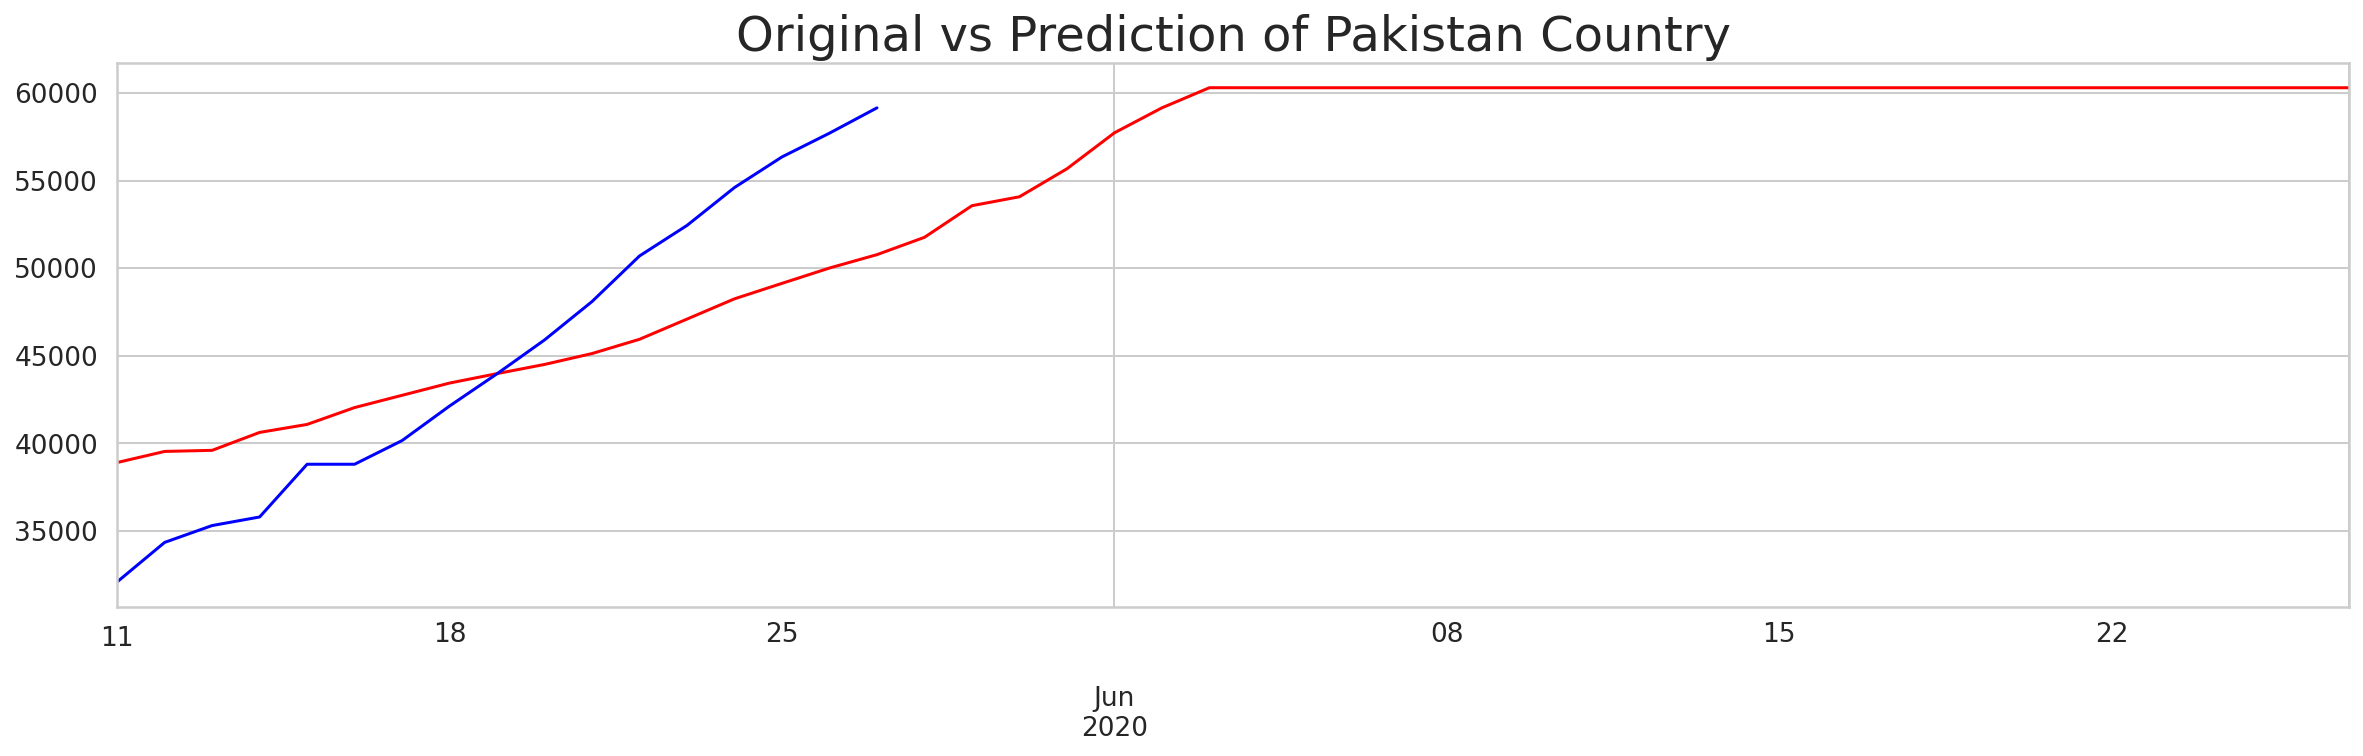

In [0]:
# Plotting the original and predicted time series of Pakistan Country:
pakistan_actual_predictions.plot(figsize=(20,5),color='red')
pakistan_test_data.plot(figsize=(20,5),color='blue')
plt.title("Original vs Prediction of Pakistan Country",size=24)
plt.show()

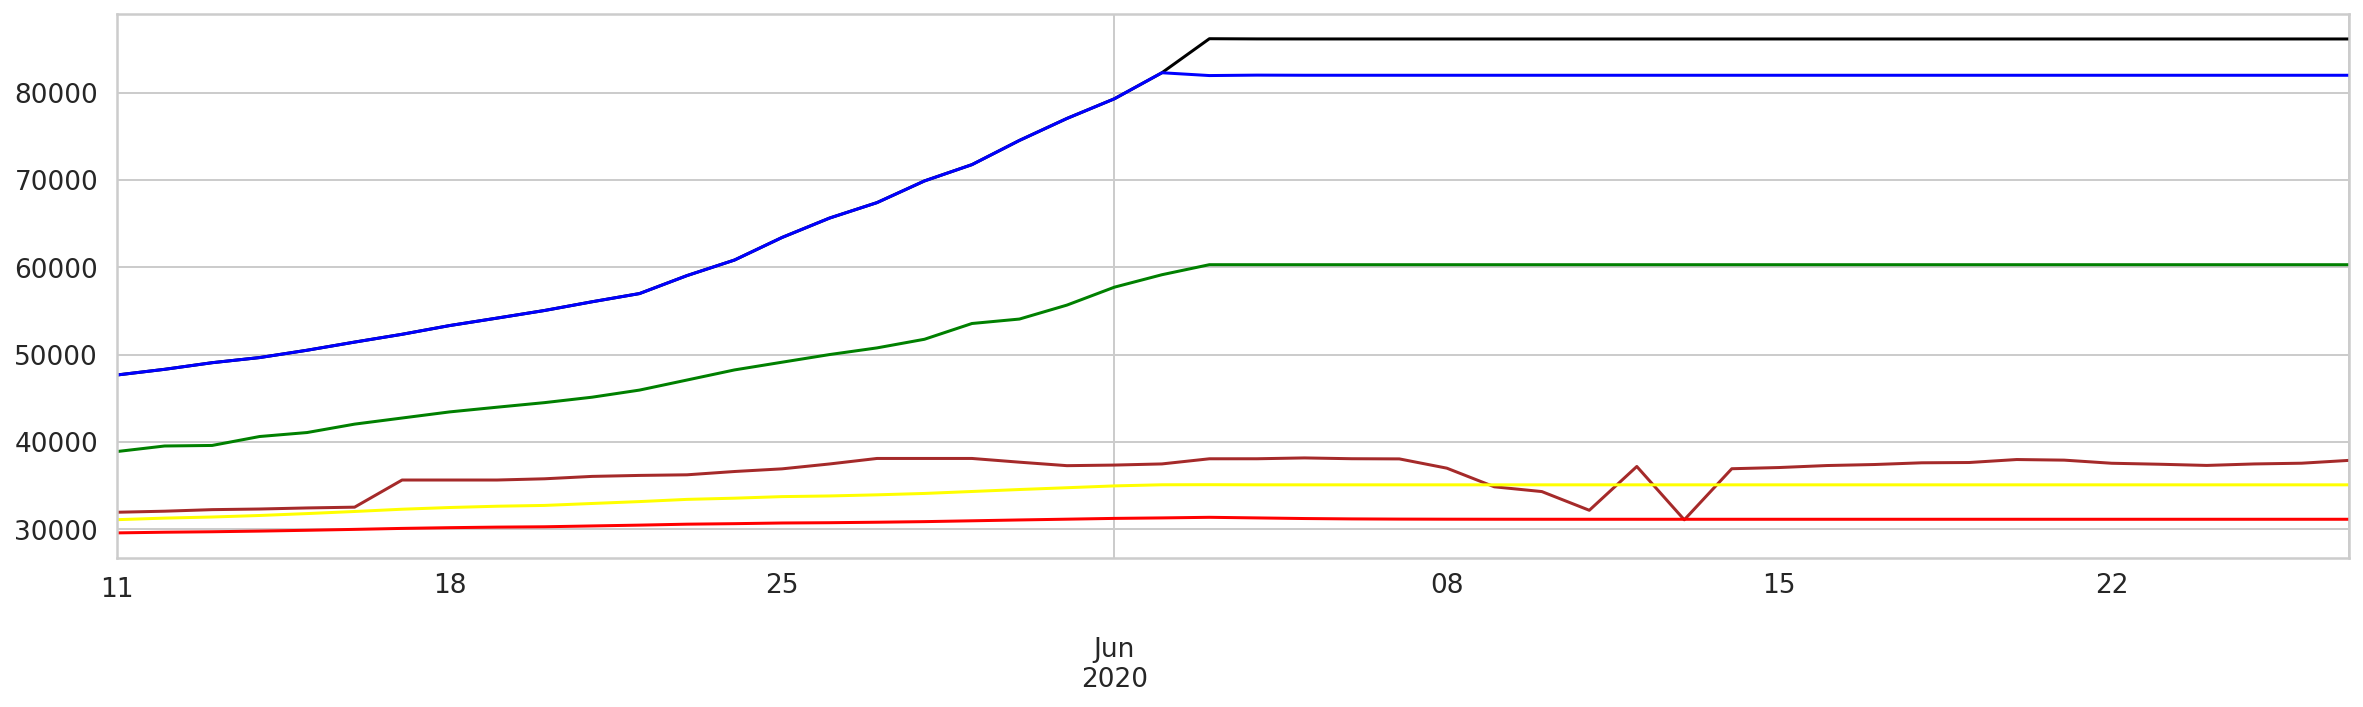

In [0]:
ecu_actual_predictions.plot(figsize=(20,5),color='brown')
sweden_actual_predictions.plot(figsize=(20,5),color='yellow')
portugal_actual_predictions.plot(figsize=(20,5),color='red')
chile_actual_predictions.plot(figsize=(20,5),color='black')
mexico_actual_predictions.plot(figsize=(20,5),color='blue')
pakistan_actual_predictions.plot(figsize=(20,5),color='green')

# **(7) Mexico seems to be the best country to predict trend in pakistan.**